In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("IMF computation")

# Import your integration methods
from pyACC.Calculus import trapezoid

**INITIAL MASS FUNCTION (IMF)**

The IMF is a key concept in stellar populations. It defines how star mass is distributed in a single formation event of a stellar population (SSP).

This quantity is at the core of many astrophysical studies, from star clusters (open/globular) to galaxies, and it's fundamental to explain observational properties of the object in study.

There are different assumptions for this distribution in literature. The more traditional is a power-law (Salpeter 1955):
$$
\xi\left(M\right)= \xi _0 M^{-\alpha}
$$
where M is the mass in solar masses unit, $\xi _0$
is a normalisation constant and $\alpha$ is the power-law exponent. A common assumption is $\alpha=2.35$.
Other, more recent definitions for the IMF are Kroupa (2002) (double power-law) and Chabrier (2003).
Starting from the IMF, we will compute some key quantities of the stellar population.

In [2]:
# Definition of the IMS python function
def get_IMF(M, alpha, xi_0):
    """
    Generic function for the IMF

    Parameters
    ----------

    M : float
        Mass of the star
    alpha : float
        Power of the IMF
    xi_0 : float    
        Normalization factor
    
    Returns
    -------
    IMF : float
        The value of the IMF at mass M
    """
    return xi_0*M**(-alpha)

Text(0, 0.5, '$\\xi(M)$')

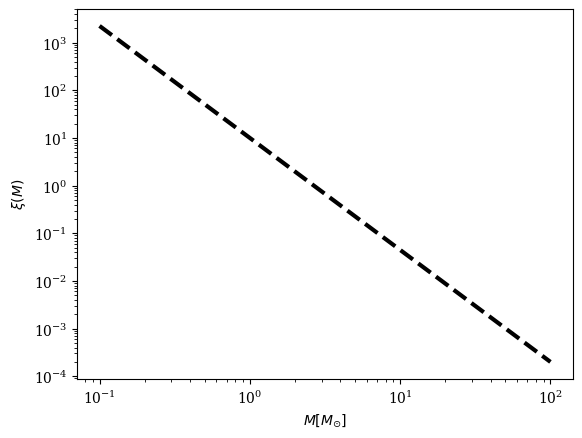

In [3]:
# Minimum and maximum mass size in solar masses unit
mass_min = 0.1
mass_max = 100

# Power of the IMF
alpha = 2.35
# Normalisation of the IMF: to find xi_0 is necessary to integrate the Salpeter law and imposing the result being equal to 1
#xi_0 = (1-alpha) * (mass_max**(-alpha + 1) - mass_min**(-alpha+1))**(-1)
xi_0 = 10 #I just want a parameter to find

# Create the mass vector
mass = np.logspace(np.log10(mass_min), np.log10(mass_max), 100)

# Plot in log scale
plt.loglog(mass, get_IMF(mass, alpha, xi_0), lw=3, color="k", ls="--")
plt.xlabel(r"$M  [M_{\odot}]$")
plt.ylabel(r"$\xi(M)$")

**Total number of stars**

You can obtain the total number of stars by integrating the IMF over the mass range. The total number of stars is given by:
$$
N=\int_{M_{min}}^{M_{max}}{\xi \left(M\right)dM}
$$

To perform this integration:

In [4]:
# Get the total number of stars

# Create the integration object
#def Salpeter(x):
#    return xi_0*x**(-alpha)


# Call your integration method to obtain the number of stars
N = trapezoid(lambda M : get_IMF(M, alpha, xi_0), mass_min, mass_max, 0.1)

# Print the result
print(f"The total number of stars is {N:.0f}")

2024-03-11 09:15:12.265899 :: IMF computation  :: The total number of stars is 203


**Average star mass**

The average star mass can be compute quite strightforwardly:
$$
\hat{M} = \frac{\int_{M_{min}}^{M_{max}}M \xi \left(M\right)dM}{\int_{M_{min}}^{M_{max}}\xi \left(M\right)dM}
$$



In [5]:
# Compute the average star mass

M_hat = trapezoid(lambda M : M*get_IMF(M, alpha, xi_0), mass_min, mass_max, 0.1)/N

print(f"The average star mass is: {M_hat:.2e} solar masses")

2024-03-11 09:15:12.288476 :: IMF computation  :: The average star mass is: 2.98e-01 solar masses


It seems like the Sun has a mass 3 to 4 times the average star ??????????

In [6]:
#Star luminosity
''' 
def get_star_luminosity(M):
    """
    Get the star luminosity using the mass-luminosity
    relation

    Parameters
    ----------
    M : float
        Mass of the star
    
    Returns
    -------
    L : float
        Luminosity of the star
    """

    if M < 0.43:
        L = 0.23 * M**2.3
    elif 0.43 < M < 2:
        L = M**4
    elif 2 < M < 20:
        L = 1.5 * M**3.5
    elif M > 20:
        L = 3200 * M
    
    return L
    '''
def get_star_luminosity(M):
    """
    Get the star luminosity using the mass-luminosity relation
    """
    L = np.where(M < 0.43, 0.23 * M**2.3,
                 np.where((M >= 0.43) & (M <= 2), M**4,
                          np.where((M > 2) & (M <= 20), 1.5 * M**3.5,
                                   np.where(M > 20, 3200 * M, np.nan))))
    return L


In [7]:
# Compute average luminosity in analogy to average mass
L_hat = trapezoid(lambda M: (get_star_luminosity(M)*get_IMF(M, alpha, xi_0))/N, mass_min, mass_max, 0.1)/N

print(f"The average star mass is: {L_hat:.2e} solar luminosity")

2024-03-11 09:15:12.486516 :: IMF computation  :: The average star mass is: 4.41e-01 solar luminosity


73 luminosità solari!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Non vedo l'errore...

Text(0, 0.5, '$L(M) [L_{\\odot}]$')

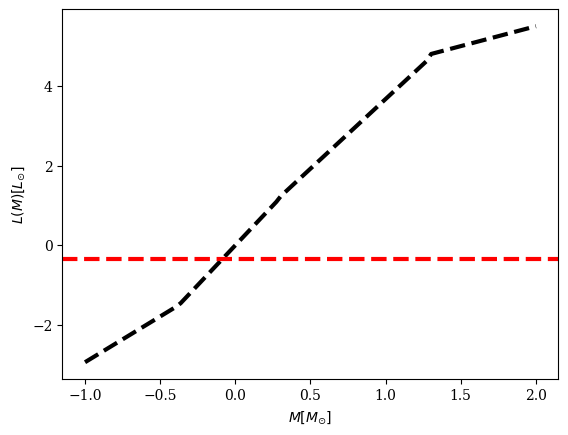

In [8]:
# Plot luminosity
plt.plot(np.log10(mass), np.log10([get_star_luminosity(m) for m in mass]), lw=3, color="k", ls="--")
plt.axhline(np.log10(L_hat), color="r", lw=3, ls="--", label="Average luminosity")
plt.xlabel(r"$M  [M_{\odot}]$")
plt.ylabel(r"$L(M) [L_{\odot}]$")